In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

### Reading the CSV

In [2]:
df=pd.read_csv('epa-sea-level.csv')

In [3]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,_
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.04635409
130,2010,8.901575,8.618110,9.185039,8.122972567
131,2011,8.964567,8.661417,9.267717,8.053065004
132,2012,9.326772,8.992126,9.661417,8.457057629


In [23]:
X1=df['Year']
x1=df[['Year']]
y1=df['CSIRO Adjusted Sea Level']

<h3>Scatter plot for the data set</h3>

<Axes: xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

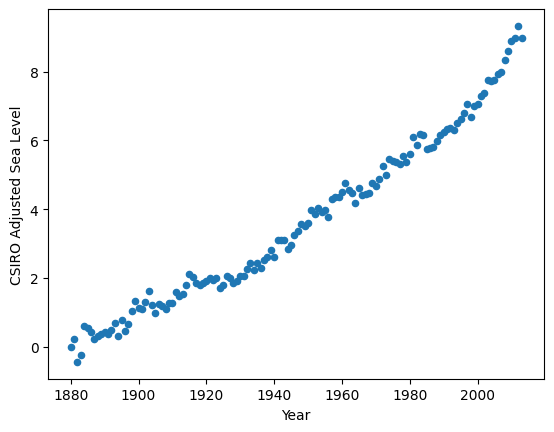

In [5]:
df.plot(kind='scatter',x='Year',y='CSIRO Adjusted Sea Level')

<h3>Prediction using sklearn from past data(from 1880)</h3>

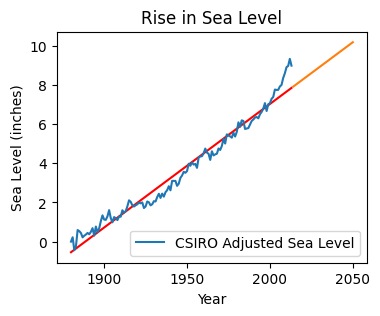

In [6]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
model=LinearRegression()
model.fit(x1,y1)
res1=stats.linregress(X1,y1)
x_predict1=np.array([i for i in range(2014,2051)])
x_predict1=pd.DataFrame(x_predict1,columns=['Year'])
ax.plot(x1, res1.intercept + res1.slope*x1, 'r', label='fitted line')     # slope and y-intercept of the line of best fit.
df.plot(kind='line',x='Year',y='CSIRO Adjusted Sea Level',ax=ax)     
y_predict1=model.predict(x_predict1)          #  predicting the sea level rise in 2050
ax.plot(x_predict1,y_predict1)            #   plotting the predicted sea level rise till 2050
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')
plt.show()

In [20]:
df2=df[df['Year']>2000]
X2=df2['Year']
x2=df2[['Year']]
x2.reset_index(drop=True,inplace=True)
y2=df[df['Year']>2000]['CSIRO Adjusted Sea Level']

121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64


,Year
0,2001
1,2002
2,2003
3,2004
4,2005
5,2006
6,2007
7,2008
8,2009
9,2010


<h3>Prediction using sklearn from recent data(from 2000)</h3>

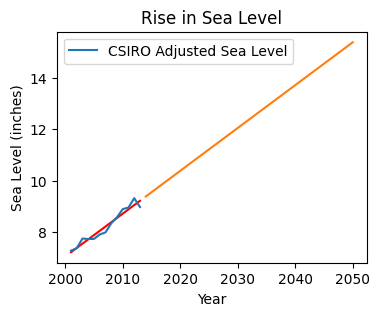

In [8]:
fig,ax1=plt.subplots(1,1,figsize=(4,3))
model=LinearRegression()
model.fit(x2,y2)
res2=stats.linregress(X2,y2)
x_predict2=np.array([i for i in range(2014,2051)])
x_predict2=pd.DataFrame(x_predict2,columns=['Year'])
ax1.plot(x2, res2.intercept + res2.slope*x2, 'r', label='fitted line')     # slope and y-intercept of the line of best fit.
df2.plot(kind='line',x='Year',y='CSIRO Adjusted Sea Level',ax=ax1)     
y_predict2=model.predict(x_predict2)          #  predicting the sea level rise in 2050
ax1.plot(x_predict2,y_predict2)            #   plotting the predicted sea level rise till 2050
ax1.set_title('Rise in Sea Level')
ax1.set_ylabel('Sea Level (inches)')
plt.show()

<h3>Combined Graph of Both Predictions</h3>

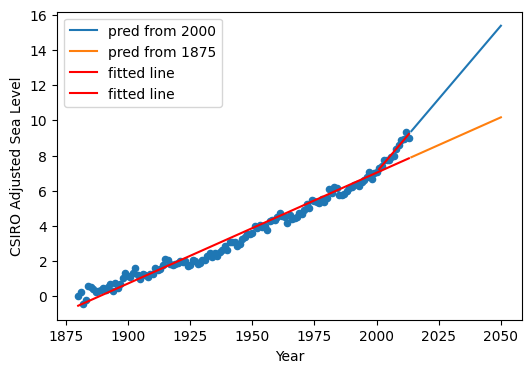

In [9]:
fig,ax=plt.subplots(figsize=(6,4))
df.plot(kind='scatter',x='Year',y='CSIRO Adjusted Sea Level',ax=ax)
ax.plot(x_predict2,y_predict2,label='pred from 2000')            #   plotting the predicted sea level rise till 2050  
ax.plot(x_predict1,y_predict1,label='pred from 1875')            #   plotting the predicted sea level rise till 2050
ax.plot(x2, res2.intercept + res2.slope*x2, 'r', label='fitted line')     # slope and y-intercept of the line of best fit.
ax.plot(x1, res1.intercept + res1.slope*x1, 'r', label='fitted line')     # slope and y-intercept of the line of best fit.

ax.legend()
plt.show()

<h3>using scipy</h3>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [12]:
df=pd.read_csv('epa-sea-level.csv')
y=df['CSIRO Adjusted Sea Level']
x=df['Year']

Text(0.5, 1.0, 'Rise in Sea Level')

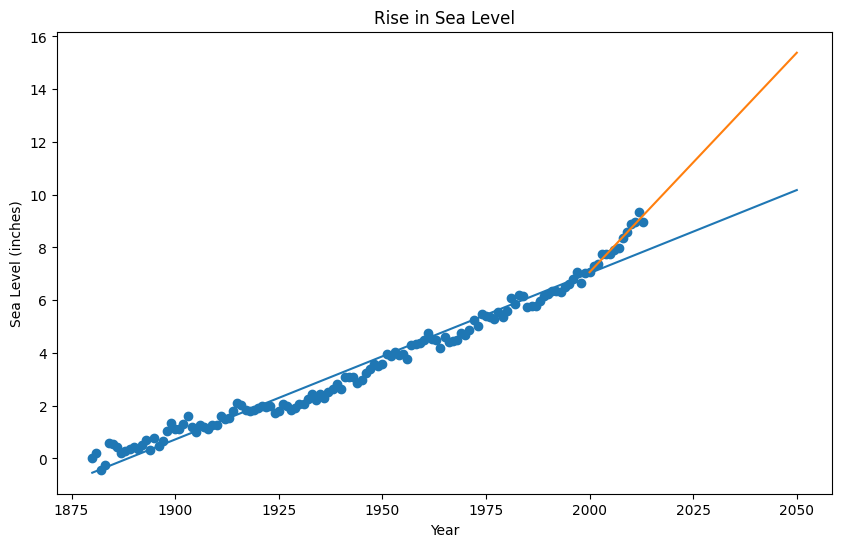

In [14]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(x,y)

# Create first line of best fit

res=linregress(x,y)
xpred=pd.Series([i for i in range(1880,2051)])
ypred=res.intercept+res.slope*xpred
plt.plot(xpred,ypred)

# Create second line of best fit

df2000=df[df['Year']>=2000]
xnew=df2000['Year']
ynew=df2000['CSIRO Adjusted Sea Level']
res2=linregress(xnew,ynew)
xpred2=pd.Series([i for i in range(2000,2051)])
ypred2=res2.intercept+res2.slope*xpred2
plt.plot(xpred2,ypred2)

# Add labels and title

ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')
